In [56]:
# read files /home/s94zalek/Diff-FMAPs-PyTorch/data/12k_shapes_train.npy
import numpy as np

# load data
shapes_train = np.load('/home/s94zalek/Diff-FMAPs-PyTorch/data/12k_shapes_train.npy', allow_pickle=True)
shapes_test = np.load('/home/s94zalek/Diff-FMAPs-PyTorch/data/12k_shapes_test.npy', allow_pickle=True)

# read /home/s94zalek/Diff-FMAPs-PyTorch/data/12ktemplate.ply

import trimesh
template = trimesh.load('/home/s94zalek/Diff-FMAPs-PyTorch/data/12ktemplate.ply')

# read /home/s94zalek/Diff-FMAPs-PyTorch/data/FAUST_noise_0.01.mat
import scipy.io
faust_noise = scipy.io.loadmat('/home/s94zalek/Diff-FMAPs-PyTorch/data/FAUST_noise_0.01.mat')

# Template shape

In [ ]:
scene = trimesh.Scene()
scene.add_geometry(template)
scene.show()

# Train dataset

In [ ]:
shapes_train.shape

In [70]:
# plot the first shape as point cloud

def points_to_spheres(points, radius=1):
    """
    Convert points into spheres for notebook-friendly display
    """
    return [
        trimesh.primitives.Sphere(radius=radius, center=pt) for pt in points
    ]

scene.geometry.clear()

# Similar example as above
v = shapes_train[4]
mesh = trimesh.Trimesh(vertices=shapes_train[40], faces=template.faces)
scene.add_geometry(mesh)

mesh = trimesh.Trimesh(vertices=shapes_train[1200] + np.array([1, 0, 0]), faces=template.faces)
scene.add_geometry(mesh)

mesh = trimesh.Trimesh(vertices=shapes_train[522] + np.array([2, 0, 0]), faces=template.faces)
scene.add_geometry(mesh)


scene.show()

# Check for intrinsic correspondence

In [ ]:
scene.geometry.clear()

# cmap = trimesh.visual.color.interpolate(np.linspace(0, 1, len(data_y['verts'][0])), 'jet')

data_x = shapes_train[10]
data_y = shapes_train[107]

# make a color map based on y coordinate
cmap = trimesh.visual.color.interpolate(template.vertices[:, 1], 'jet')


# add the first mesh
mesh1 = trimesh.Trimesh(vertices=data_x, faces=template.faces)
mesh1.visual.vertex_colors = cmap
scene.add_geometry(mesh1)

mesh2 = trimesh.Trimesh(vertices=data_y + np.array([1, 0, 0]), faces=template.faces)
mesh2.visual.vertex_colors = cmap[:len(mesh2.vertices)]
scene.add_geometry(mesh2)


# display the scene
scene.show('notebook')

# Noised FAUST

In [ ]:
print("faust_noise['faces'].shape", faust_noise['faces'].shape)
print("faust_noise['vertices'].shape", faust_noise['vertices'].shape)

In [ ]:
# faust_noise_0 = trimesh.Trimesh(vertices=faust_noise['vertices'][7], faces=faust_noise['faces'] - 1)
# faust_noise_50 = trimesh.Trimesh(vertices=faust_noise['vertices'][56] + np.array([1, 0, 0]),
#                                  faces=faust_noise['faces'] - 1)

faust_noise_0 = trimesh.PointCloud(faust_noise['vertices'][7], colors=np.zeros_like(faust_noise['vertices'][7]))
faust_noise_50 = trimesh.PointCloud(faust_noise['vertices'][56] + np.array([1, 0, 0]),
                                      colors=np.zeros_like(faust_noise['vertices'][56]))

scene.geometry.clear()
scene.add_geometry(faust_noise_0)
scene.add_geometry(faust_noise_50)
scene.show()

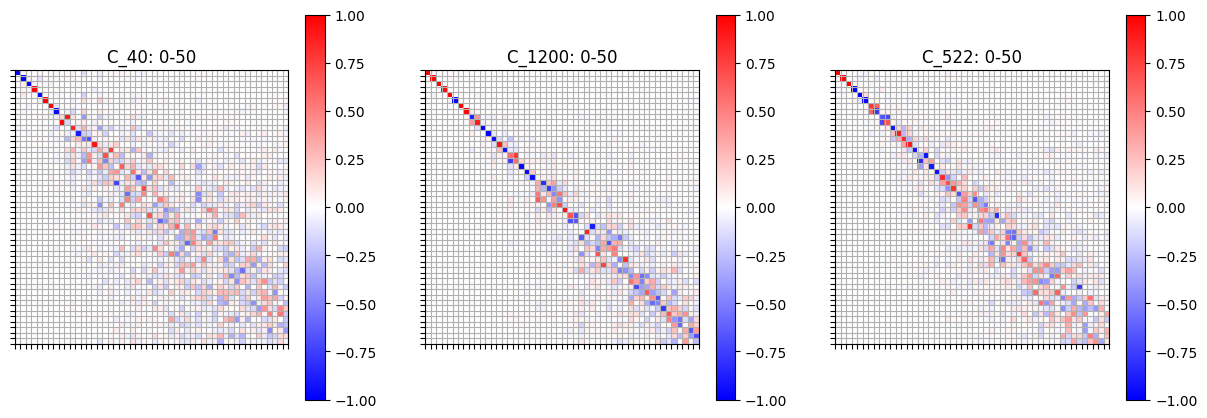

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def plot_Cxy(figure, axis, Cxy_plt, title, min_dim, max_dim):
    
    axis_plot = axis.imshow(Cxy_plt[min_dim:max_dim, min_dim:max_dim], cmap='bwr', vmin=-1, vmax=1)
    figure.colorbar(axis_plot, ax=axis)
    
    axis.set_title(f'{title}: {min_dim}-{max_dim}')

    axis.set_xticks(np.arange(-0.5, max_dim - min_dim, 1.0))
    axis.set_yticks(np.arange(-0.5, max_dim - min_dim, 1.0))     
    axis.grid(which='both')
    
    axis.set_xticklabels([])
    axis.set_yticklabels([])
   

'/home/s94zalek/shape_matching/data/SURREAL/functional_maps/train/00004.txt'

C_4 = np.loadtxt('/home/s94zalek/shape_matching/data/SURREAL/functional_maps/train/00040.txt')
C_120 = np.loadtxt('/home/s94zalek/shape_matching/data/SURREAL/functional_maps/train/01200.txt')
C_522 = np.loadtxt('/home/s94zalek/shape_matching/data/SURREAL/functional_maps/train/00522.txt')

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_Cxy(fig, ax[0], C_4, 'C_40', 0, 50)
plot_Cxy(fig, ax[1], C_120, 'C_1200', 0, 50)
plot_Cxy(fig, ax[2], C_522, 'C_522', 0, 50)

In [25]:
eigenvalues = np.loadtxt('/home/s94zalek/shape_matching/data/SURREAL/eigenvalues/train/eigenvalues.txt')
eigenvalues.shape

(10000, 50)

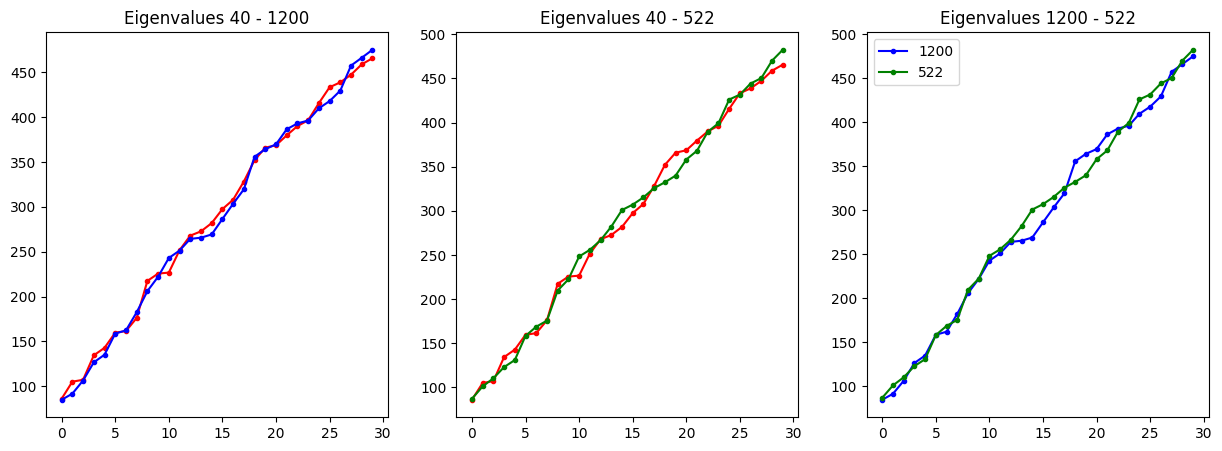

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(eigenvalues[40, 10:40], '.-', label='40', color='red')
ax[0].plot(eigenvalues[1200, 10:40], '.-', label='1200', color='blue')
# ax[0].set_yscale('log')
ax[0].set_title('Eigenvalues 40 - 1200')

ax[1].plot(eigenvalues[40, 10:40], '.-', label='40', color='red')
ax[1].plot(eigenvalues[522, 10:40], '.-', label='522', color='green')
# ax[1].set_yscale('log')
ax[1].set_title('Eigenvalues 40 - 522')

ax[2].plot(eigenvalues[1200, 10:40], '.-', label='1200', color='blue')
ax[2].plot(eigenvalues[522, 10:40], '.-', label='522', color='green')
# ax[2].set_yscale('log')
ax[2].set_title('Eigenvalues 1200 - 522')

plt.legend()

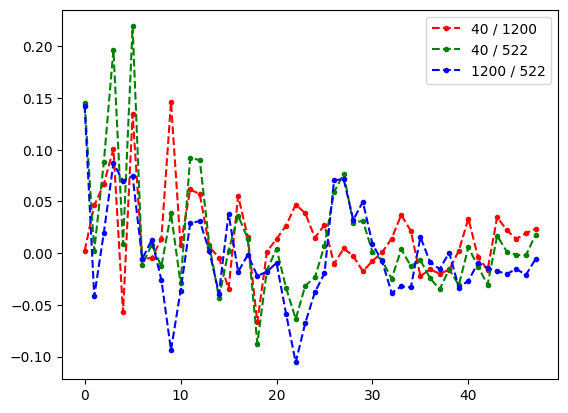

In [64]:

plt.plot((eigenvalues[40, 2:] - eigenvalues[1200, 2:])/eigenvalues[1200, 2:], '.', label='40 / 1200', color='red', linestyle='dashed')
plt.plot((eigenvalues[40, 2:] - eigenvalues[522, 2:])/eigenvalues[522, 2:], '.', label='40 / 522', color='green', linestyle='dashed')
plt.plot((eigenvalues[1200, 2:] - eigenvalues[522, 2:])/eigenvalues[522, 2:], '.', label='1200 / 522', color='blue', linestyle='dashed')

plt.legend()
plt.show()

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=10)
tsne = TSNE(n_components=2)
scaler = StandardScaler()

data_scaled = scaler.fit_transform(eigenvalues)
pca_data = pca.fit_transform(data_scaled)
tsne_data = tsne.fit_transform(pca_data)


Text(0.5, 1.0, 'PCA')

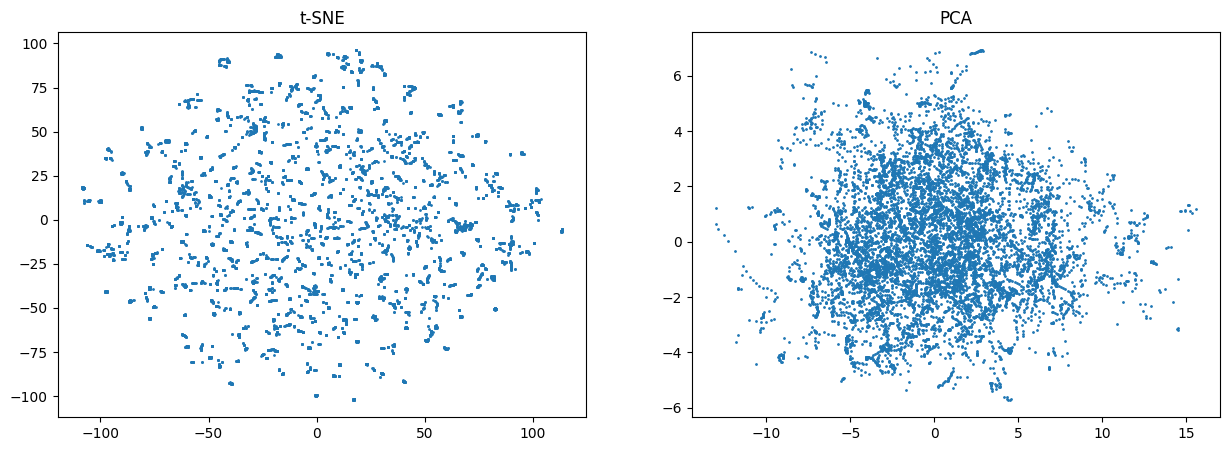

In [36]:
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(tsne_data[:, 0], tsne_data[:, 1], s=1)
ax[0].set_title('t-SNE')

ax[1].scatter(pca_data[:, 0], pca_data[:, 1], s=1)
ax[1].set_title('PCA')


# sns.pairplot(pd.DataFrame(pca_data[:1000, :3]), diag_kind='kde')

